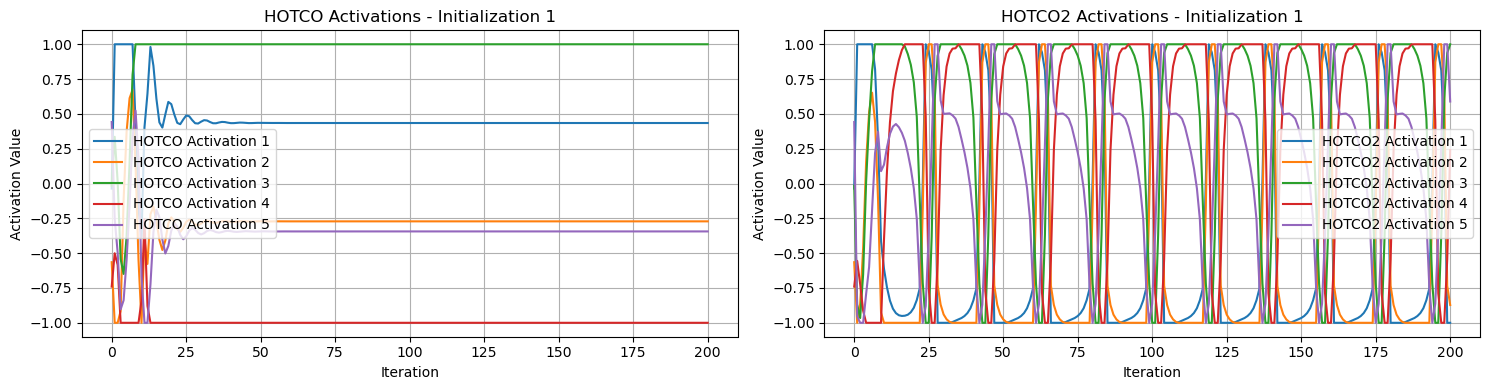

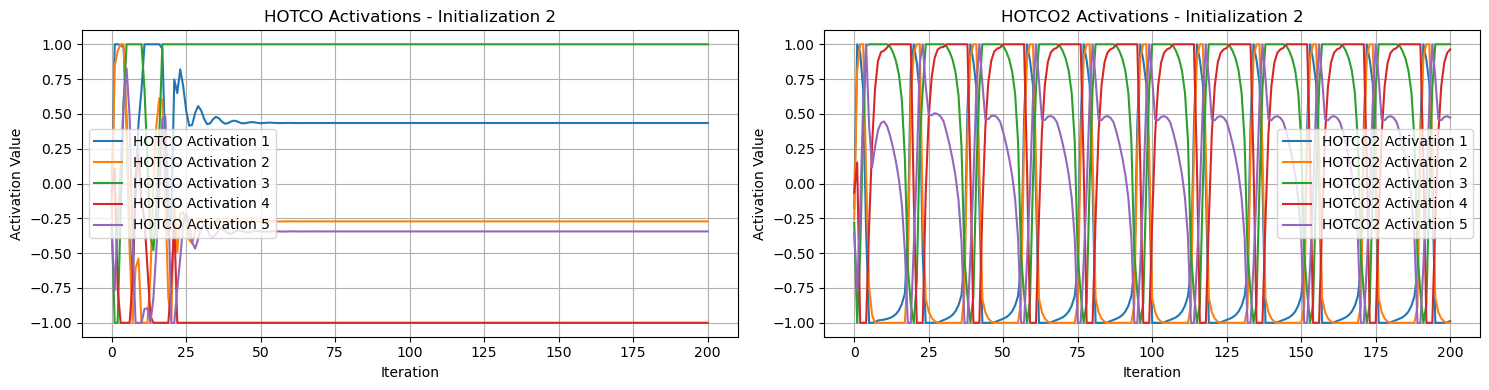

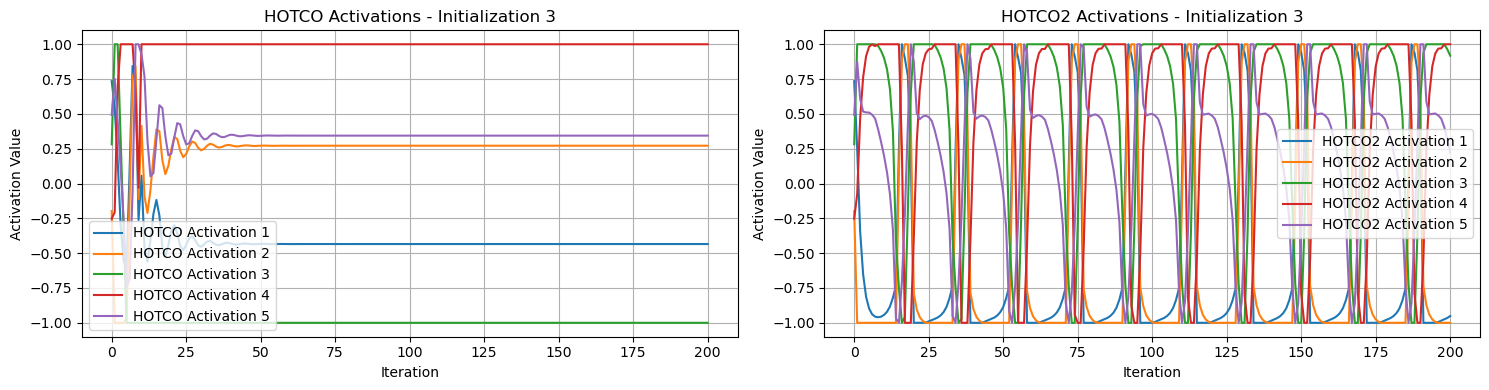

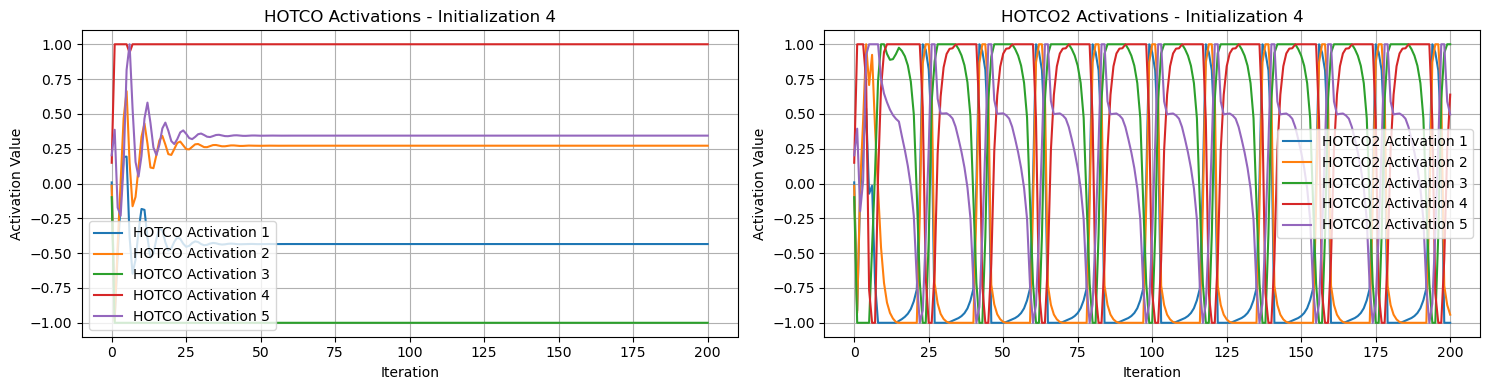

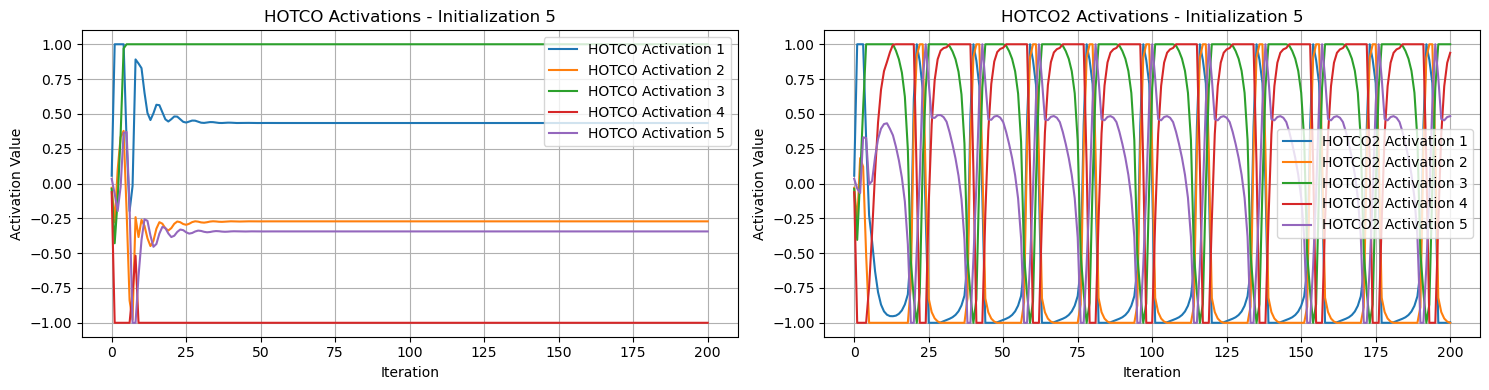

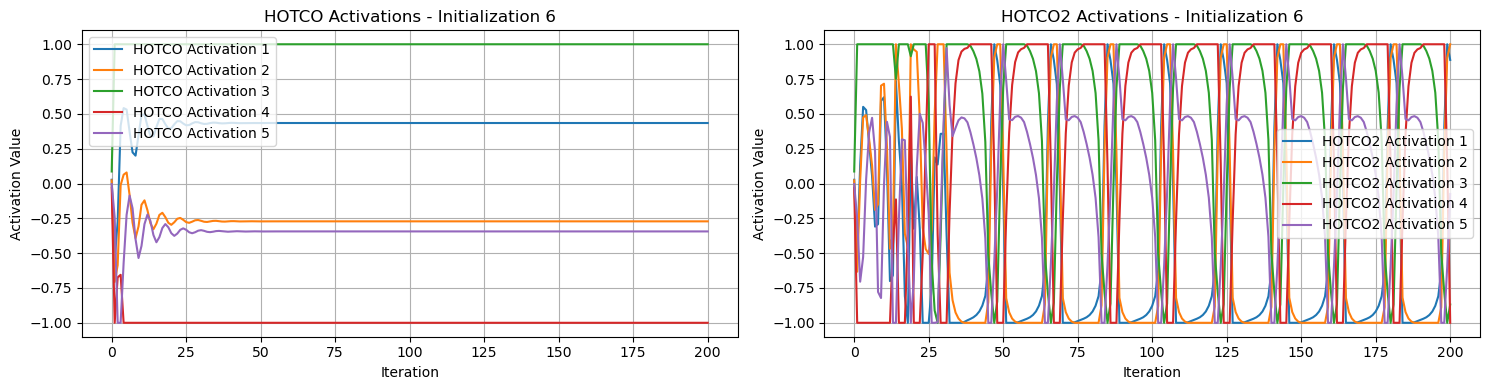

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Decay parameter
d = 0.05

# Define the non-decreasing function f to scale the sum
def f(x):
    return np.tanh(x)

# Rescaling function to map activations to the range [-1, 1]
def rescale(activations):
    min_activation = np.min(activations)
    max_activation = np.max(activations)
    return -1 + 2 * (activations - min_activation) / (max_activation - min_activation)



# Function to simulate HOTCO model
def simulate_hotco(weights, initial_activations, num_iterations):
    activations = np.array(initial_activations)
    activations_list = [activations.copy()]
    
    for _ in range(num_iterations):
        weighted_sum_activations = np.dot(weights, activations)
        #Update activations
        activations = activations + f(weighted_sum_activations)
        activations = rescale(activations)
        activations_list.append(activations.copy())
    
    return activations_list

# Function to simulate HOTCO2 model
def simulate_hotco2(weights, initial_activations, initial_valences, num_iterations):
    activations = np.array(initial_activations)
    valences = np.array(initial_valences)
    activations_list = [activations.copy()]
    
    for _ in range(num_iterations):

        weighted_sum_activations = np.dot(weights, activations)
        weighted_sum_valences = np.dot(weights, activations * valences)
    
        #Update activations
        activations = activations + f(weighted_sum_activations + weighted_sum_valences)
        #Update valences 
        valences = valences + f(weighted_sum_valences)

        activations = rescale(activations)
        valences = rescale(valences)
        
        activations_list.append(activations.copy())
    
    return activations_list

# Example usage:
if __name__ == "__main__":
    # Define random weights
    weights = np.random.uniform(-1, 1, size=(5, 5))
    
    # Define different initializations for activations and valences
    initializations = [
        (np.random.uniform(-1, 1, size=5), np.random.uniform(-1, 1, size=5)),
        (np.random.uniform(-0.5, 0.5, size=5), np.random.uniform(-0.5, 0.5, size=5)),
        (np.random.uniform(-0.75, 0.75, size=5), np.random.uniform(-0.75, 0.75, size=5)),
        (np.random.uniform(-0.25, 0.25, size=5), np.random.uniform(-0.25, 0.25, size=5)),
        (np.random.uniform(-0.1, 0.1, size=5), np.random.uniform(-0.1, 0.1, size=5)),
        (np.random.uniform(-0.1, 0.1, size=5), np.random.uniform(-0.1, 0.1, size=5))
    ]
    
    num_iterations = 200
    
    # Plot activations for different initializations
    for idx, (initial_activations, initial_valences) in enumerate(initializations):
        # Simulate HOTCO model
        hotco_activations = simulate_hotco(weights, initial_activations, num_iterations)
        
        # Simulate HOTCO2 model
        hotco2_activations = simulate_hotco2(weights, initial_activations, initial_valences, num_iterations)
        
        # Create subplots
        plt.figure(figsize=(15, 4))
        
        # Plot activations for HOTCO
        plt.subplot(1, 2, 1)
        for i in range(len(hotco_activations[0])):
            plt.plot([activations[i] for activations in hotco_activations], label=f"HOTCO Activation {i+1}")
        plt.title(f"HOTCO Activations - Initialization {idx+1}")
        plt.xlabel("Iteration")
        plt.ylabel("Activation Value")
        plt.legend()
        plt.grid(True)
        
        # Plot activations for HOTCO2
        plt.subplot(1, 2, 2)
        for i in range(len(hotco2_activations[0])):
            plt.plot([activations[i] for activations in hotco2_activations], label=f"HOTCO2 Activation {i+1}")
        plt.title(f"HOTCO2 Activations - Initialization {idx+1}")
        plt.xlabel("Iteration")
        plt.ylabel("Activation Value")
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()


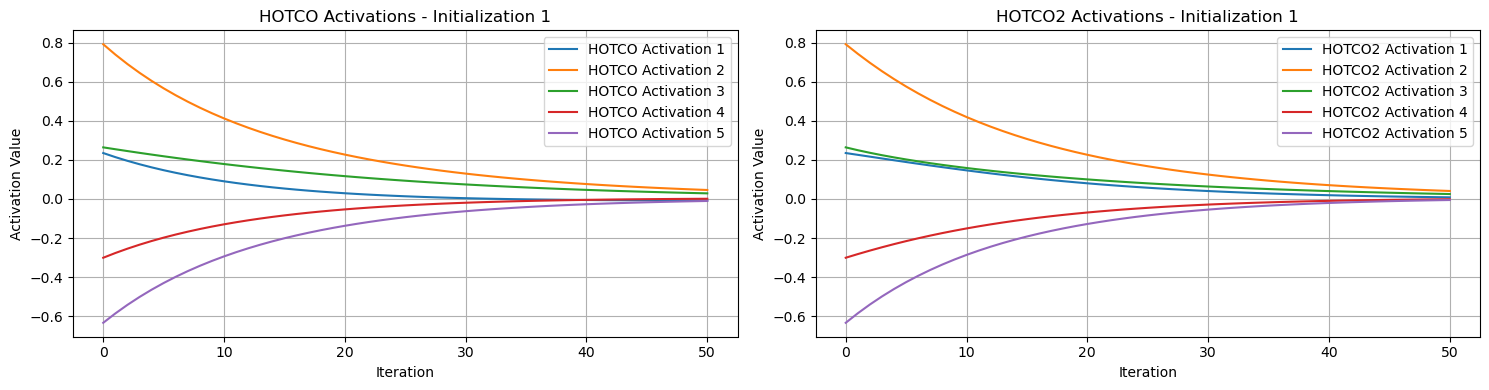

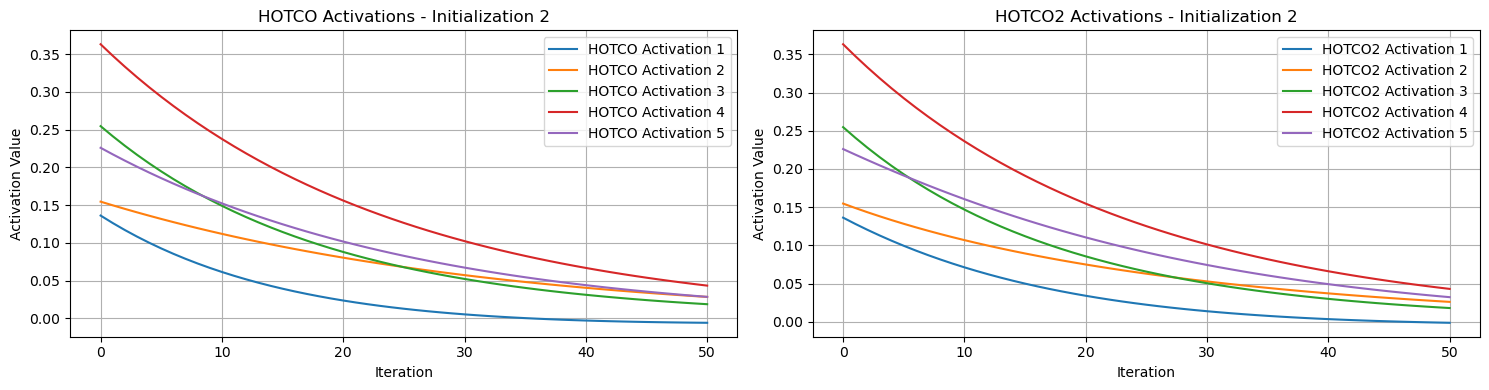

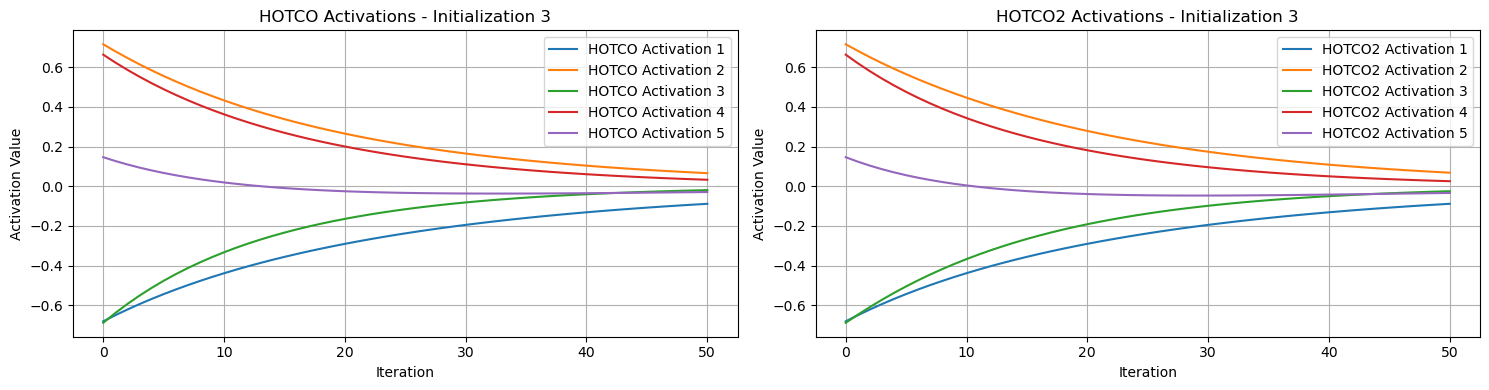

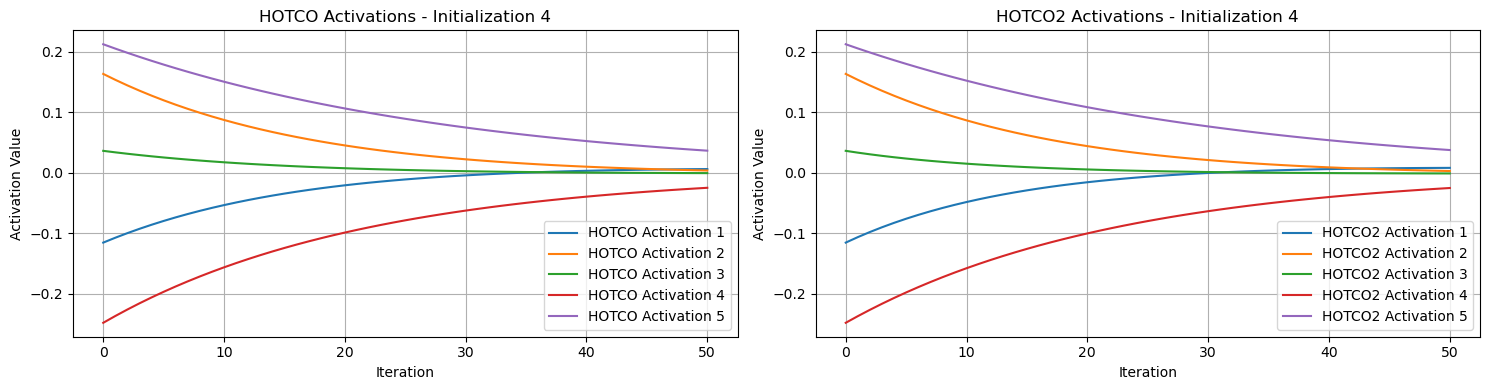

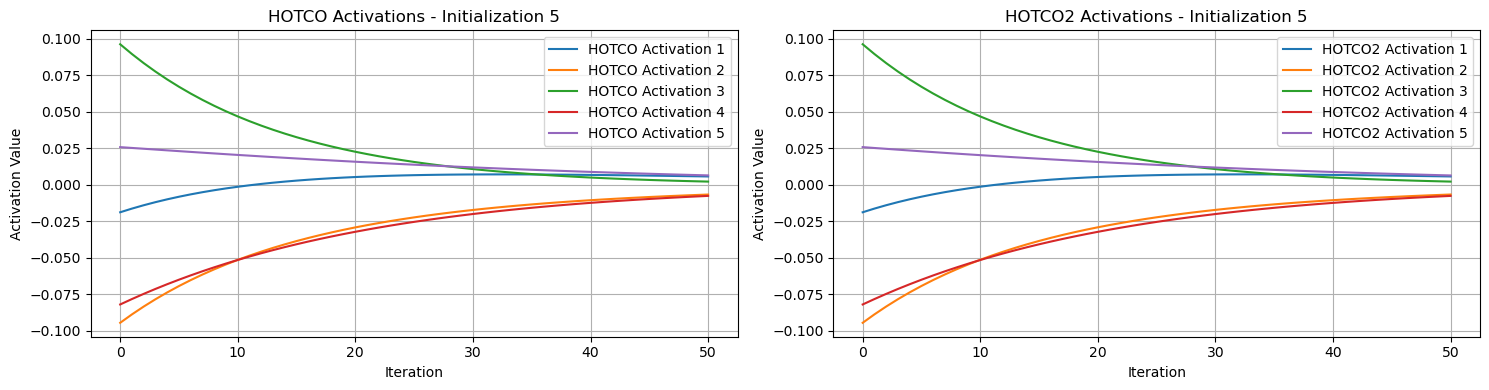

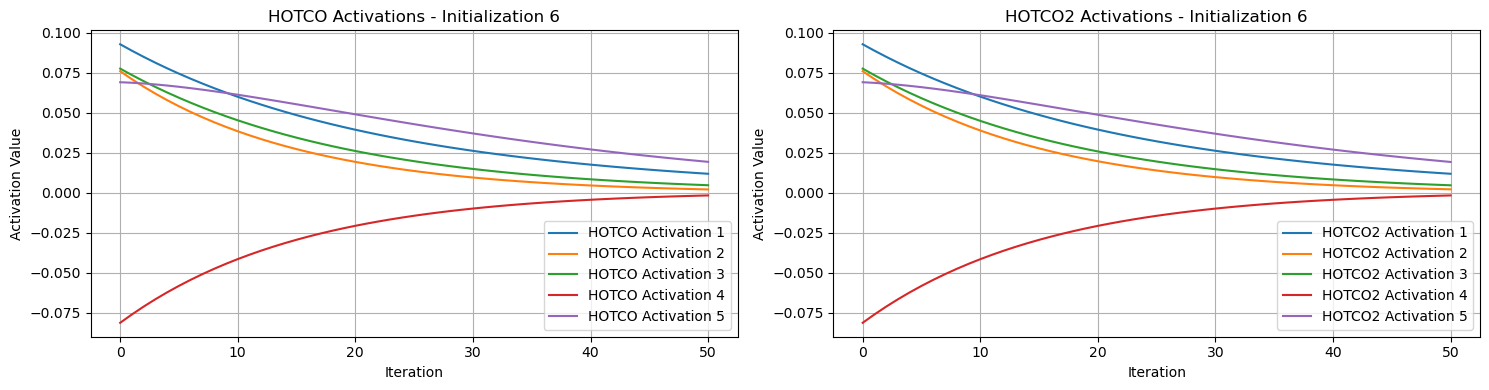

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Decay parameter
d = 0.05

# Define the non-decreasing function f to scale the sum
def f(x):
    #return np.tanh(x)
    return x/100

# Rescaling function to map activations to the range [-1, 1]
def rescale(activations):
    min_activation = np.min(activations)
    max_activation = np.max(activations)
    return -1 + 2 * (activations - min_activation) / (max_activation - min_activation)



# Function to simulate HOTCO model
def simulate_hotco(weights, initial_activations, num_iterations):
    activations = np.array(initial_activations)
    activations_list = [activations.copy()]
    
    for _ in range(num_iterations):
        weighted_sum_activations = np.dot(weights, activations)
        #print(weighted_sum_activations)
        net = f(weighted_sum_activations)
        #print(net)
        #Update activations

        for i in range(len(activations)):

            if net[i]>0:

                activations[i] = activations[i]*(1-d) + net[i]*(1-activations[i])

            else:

                activations[i] = activations[i]*(1-d) + net[i]*(activations[i]+1)

        #activations = rescale(activations)
        activations_list.append(activations.copy())
    
    return activations_list

# Function to simulate HOTCO2 model
def simulate_hotco2(weights, initial_activations, initial_valences, num_iterations):
    activations = np.array(initial_activations)
    valences = np.array(initial_valences)
    activations_list = [activations.copy()]
    
    for _ in range(num_iterations):

        weighted_sum_activations = np.dot(weights, activations)
        weighted_sum_valences = np.dot(weights, activations * valences)
        #Update activations
        net_act = f(weighted_sum_activations + weighted_sum_valences)
        #Update valences 
        net_val = f(weighted_sum_valences)

        #activations = rescale(activations)
        #valences = rescale(valences)

        for i in range(len(activations)):
            
            if net_act[i]>0:

                activations[i] = activations[i]*(1-d) + net_act[i]*(1-activations[i])
                

            else:

                activations[i] = activations[i]*(1-d) + net_act[i]*(activations[i]+1)

        
            
            if net_val[i]>0:

                valences[i] = valences[i]*(1-d) + net_val[i]*(1-valences[i])
                

            else:

                valences[i] = valences[i]*(1-d) + net_val[i]*(1+valences[i])        
        
        activations_list.append(activations.copy())

    
    return activations_list

# Example usage:
if __name__ == "__main__":
    # Define random weights
    weights = np.random.uniform(-1, 1, size=(5, 5))
    
    # Define different initializations for activations and valences
    initializations = [
        (np.random.uniform(-1, 1, size=5), np.random.uniform(-1, 1, size=5)),
        (np.random.uniform(-0.5, 0.5, size=5), np.random.uniform(-0.5, 0.5, size=5)),
        (np.random.uniform(-0.75, 0.75, size=5), np.random.uniform(-0.75, 0.75, size=5)),
        (np.random.uniform(-0.25, 0.25, size=5), np.random.uniform(-0.25, 0.25, size=5)),
        (np.random.uniform(-0.1, 0.1, size=5), np.random.uniform(-0.1, 0.1, size=5)),
        (np.random.uniform(-0.1, 0.1, size=5), np.random.uniform(-0.1, 0.1, size=5))
    ]
    
    num_iterations = 50
    
    # Plot activations for different initializations
    for idx, (initial_activations, initial_valences) in enumerate(initializations):
        # Simulate HOTCO model
        hotco_activations = simulate_hotco(weights, initial_activations, num_iterations)
        
        # Simulate HOTCO2 model
        hotco2_activations = simulate_hotco2(weights, initial_activations, initial_valences, num_iterations)
        
        # Create subplots
        plt.figure(figsize=(15, 4))
        
        # Plot activations for HOTCO
        plt.subplot(1, 2, 1)
        for i in range(len(hotco_activations[0])):
            plt.plot([activations[i] for activations in hotco_activations], label=f"HOTCO Activation {i+1}")
        plt.title(f"HOTCO Activations - Initialization {idx+1}")
        plt.xlabel("Iteration")
        plt.ylabel("Activation Value")
        plt.legend()
        plt.grid(True)
        
        # Plot activations for HOTCO2
        plt.subplot(1, 2, 2)
        for i in range(len(hotco2_activations[0])):
            plt.plot([activations[i] for activations in hotco2_activations], label=f"HOTCO2 Activation {i+1}")
        plt.title(f"HOTCO2 Activations - Initialization {idx+1}")
        plt.xlabel("Iteration")
        plt.ylabel("Activation Value")
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def scale_to_minus_one_one_sigmoid(x):
    return 2 * sigmoid(x) - 1

# Define the non-decreasing function f to scale the sum
def f(x):
    # return x
    return np.tanh(x)
    # return np.sqrt(abs(x))
    # return scale_to_minus_one_one_sigmoid(x)

# Rescaling function to map activations to the range [-1, 1]
def rescale(activations):
    min_activation = np.min(activations)
    max_activation = np.max(activations)
    return -1 + 2 * (activations - min_activation) / (max_activation - min_activation)



# Function to simulate HOTCO model
def simulate_hotco(weights, initial_activations, num_iterations,decay):
    activations = np.array(initial_activations)
    activations_list = [activations.copy()]
    max_activations = [activations.copy()]
    harmony = []
    triangular_weights = weights.copy()
    triangular_weights[np.tril_indices(len(weights), -1)] = 0
    
    for _ in range(num_iterations):
        weighted_sum_activations = np.dot(weights, activations)
        net = f(weighted_sum_activations)
        # print(weighted_sum_activations)
        # print(net)
        
        #Update activations

        for i in range(len(activations)):

            if net[i]>0:
                activations[i] = activations[i]*(1-decay) + net[i]*(1-activations[i])
            else:
                activations[i] = activations[i]*(1-decay) + net[i]*(activations[i]+1)
    
        # activations = rescale(activations)
        activations_list.append(activations.copy())
        
        #let's try to keep the activation values which maximize the harmony

        new_harmony = np.sum(np.dot(triangular_weights, activations))
        harmony.append(new_harmony)
        # print(harmony)
        
        if  new_harmony >= max(harmony):
            max_activations = [activations.copy()]
            
    
    
    return activations_list, harmony

# Function to simulate HOTCO2 model
def simulate_hotco2(weights, initial_activations, initial_valences, num_iterations,decay):
    activations = np.array(initial_activations)
    valences = np.array(initial_valences)
    activations_list = [activations.copy()]
    max_activations = [activations.copy()]
    harmony = []
    triangular_weights = weights.copy()
    triangular_weights[np.tril_indices(len(weights), -1)] = 0
    print(triangular_weights)
    
    for _ in range(num_iterations):

        weighted_sum_activations = np.dot(weights, activations)
        tr_weighted_sum_activations = np.dot(triangular_weights, activations)
        weighted_sum_valences = np.dot(weights, activations * valences)
        tr_weighted_sum_valences = np.dot(triangular_weights, activations * valences)
        #Update activations
        net_act = f(weighted_sum_activations + weighted_sum_valences)
        #Update valences 
        net_val = f(weighted_sum_valences)

        for i in range(len(activations)):
            
            if net_act[i]>0:
                activations[i] = activations[i]*(1-decay) + net_act[i]*(1-activations[i])
            else:
                activations[i] = activations[i]*(1-decay) + net_act[i]*(activations[i]+1)

            if net_val[i]>0:
                valences[i] = valences[i]*(1-d) + net_val[i]*(1-valences[i])
            else:
                valences[i] = valences[i]*(1-d) + net_val[i]*(1+valences[i])     
                
        # activations = rescale(activations)
        # valences = rescale(valences)
        activations_list.append(activations.copy())
    
        new_harmony = np.sum(tr_weighted_sum_activations + np.dot(activations,tr_weighted_sum_valences) + np.dot(valences,tr_weighted_sum_valences)) 
        harmony.append(new_harmony)
        #let's try to keep the activation values which maximize the harmony
        if new_harmony >= max(harmony):
            max_activations = [activations.copy()]
        # print(harmony)
    
    #print(max_activations)
    return activations_list, harmony

# Example usage:
def simulations(num_iterations,n_nodes,decay=0):
    
    
    
    
    # Define random weights, being a symmetrical matrix with null diagonal
    weights = np.random.uniform(-1, 1, size=(n_nodes, n_nodes))
    weights = (weights + weights.T) / 2
    np.fill_diagonal(weights, 0)
    #print(weights)
    
    # Define different initializations for activations and valences
    initializations = [
        (np.random.uniform(-1, 1, size=n_nodes), np.random.uniform(-1, 1, size=n_nodes))
    ]
    

    # Plot activations for different initializations
    for idx, (initial_activations, initial_valences) in enumerate(initializations):
        # Simulate HOTCO model
        simulation_hotco = simulate_hotco(weights, initial_activations, num_iterations,decay)
        hotco_activations = simulation_hotco[0]
        hotco_harmony = simulation_hotco[1]
        # Simulate HOTCO2 model
        simulation_hotco2 = simulate_hotco2(weights, initial_activations,initial_valences, num_iterations,decay)
        hotco2_activations = simulation_hotco2[0]
        hotco2_harmony = simulation_hotco2[1]
        

        
        # Create subplots
        plt.figure(figsize=(15, 4))
        
        # Plot activations for HOTCO
        plt.subplot(1, 3, 1)
        for i in range(len(hotco_activations[0])):
            plt.plot([activations[i] for activations in hotco_activations], label=f"HOTCO Activation {i+1}")
        plt.title(f"HOTCO Activations - Simulation with {len(hotco2_activations[0])} Nodes")
        plt.xlabel("Iteration")
        plt.ylabel("Activation Value")
        plt.legend()
        plt.grid(True)
        

         # Plot harmony for HOTCO
        plt.subplot(1, 3, 3)

        
        
        plt.plot([activations for activations in hotco_harmony], label=f"HOTCO Harmonies ")
        plt.plot([activations for activations in hotco2_harmony], label=f"HOTCO2 Harmonies")
        plt.title(f"HOTCO and HOTCO2 Harmonies - Simulation with {len(hotco2_activations[0])} Nodes")
        plt.xlabel("Iteration")
        plt.ylabel("Activation Value")
        plt.legend()
        plt.grid(True)
        

        # Plot activations for HOTCO2
        plt.subplot(1, 3, 2)
        for i in range(len(hotco2_activations[0])):
            plt.plot([activations[i] for activations in hotco2_activations], label=f"HOTCO2 Activation {i+1}")
        plt.title(f"HOTCO2 Activations - Simulation with {len(hotco2_activations[0])} Nodes")
        plt.xlabel("Iteration")
        plt.ylabel("Activation Value")
        plt.legend()
        plt.grid(True)


    
        plt.tight_layout()
        plt.show()


[[ 0.          0.14869205 -0.37904777  0.57962487]
 [ 0.          0.          0.02383778  0.20245961]
 [ 0.          0.          0.         -0.52646105]
 [ 0.          0.          0.          0.        ]]


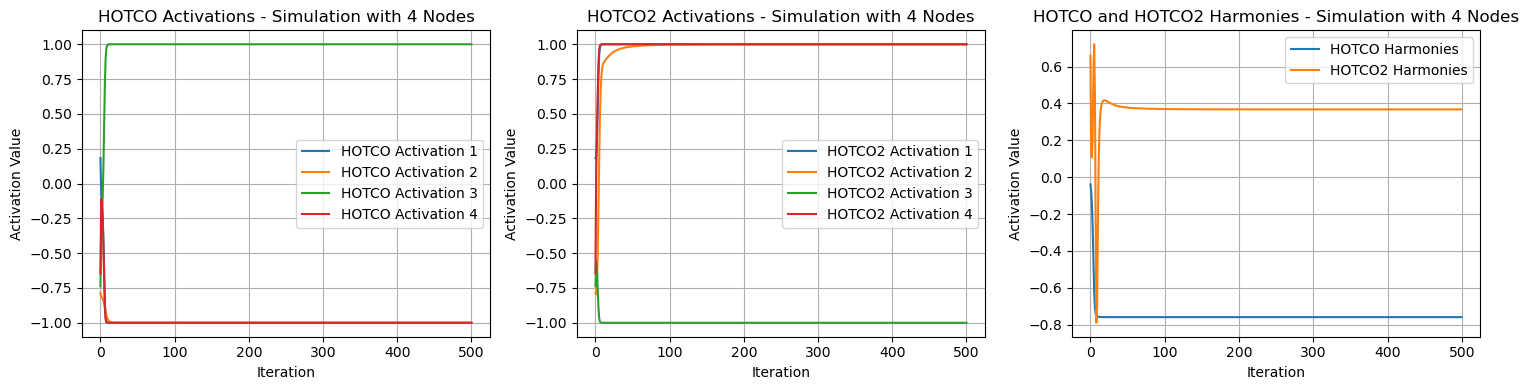

[[ 0.         -0.10540743  0.07845764 -0.49660281]
 [ 0.          0.          0.23372698  0.47014772]
 [ 0.          0.          0.          0.12906043]
 [ 0.          0.          0.          0.        ]]


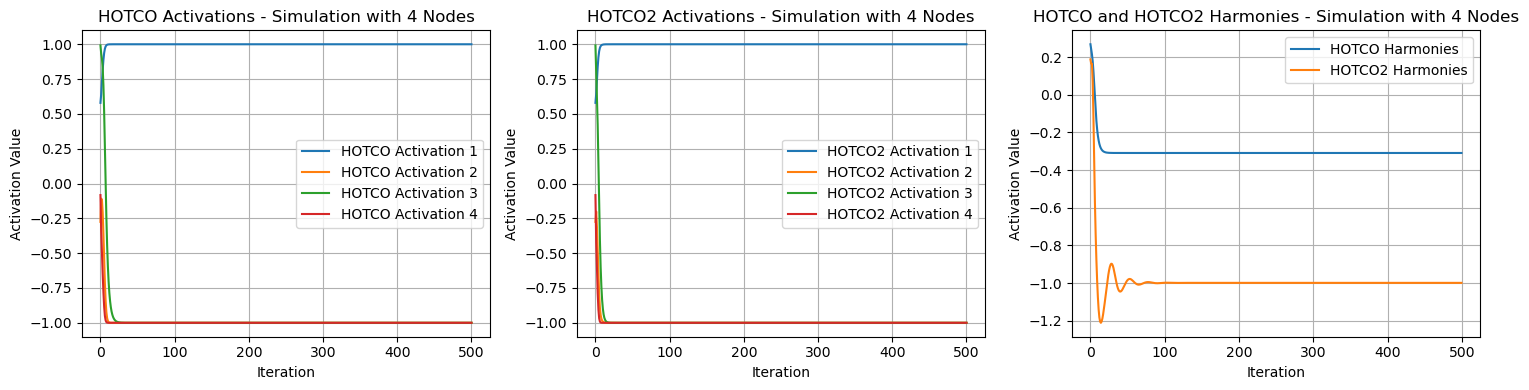

In [ ]:
simulations(500,4)
simulations(500,4)
simulations(500,4)
simulations(500,4)